# Relationships

This chapter explores relationships between variables.

- We will visualize relationships using scatter plots, box plots, and violin plots,

- And we will quantify relationships using correlation and simple regression.

The most important lesson in this chapter is that you should always visualize the relationship between variables before you try to quantify it; otherwise, you are likely to be misled.

Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.

# 1. Exploring Relations

So far we have only looked at one variable at a time. Now it’s time to explore relationships between variables. As a first example, we’ll look at the relationship between age and weight.

We’ll use data from the Behavioral Risk Factor Surveillance System (BRFSS), which is run by the Centers for Disease Control at https://www.cdc.gov/brfss. The survey includes more than 400,000 respondents, but to keep things manageable, I’ve selected a random subsample of 100,000.

1.1 PMF of age

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def underride(d, **options):
    """Add key-value pairs to d only if key is not in d.

    d: dictionary
    options: keyword args to add to d
    """
    for key, val in options.items():
        d.setdefault(key, val)

    return d

class Pmf(pd.Series):
    
    def __init__(self, seq, name='Pmf', **options):
        """Make a PMF from a sequence.
        
        seq: sequence of values
        name: string
        sort: boolean, whether to sort the values, default True
        normalize: boolean, whether to normalize the Pmf, default True
        dropna: boolean, whether to drop NaN, default True
        """
        # get the sort flag
        sort = options.pop('sort', True)

        # normalize unless the caller said not to
        underride(options, normalize=True)
        
        # put the seq in a Series so we can use value_counts
        series = pd.Series(seq, copy=False)
        
        # make the counts
        # by default value_counts sorts by frequency, which
        # is not what we want
        options['sort'] = False
        counts = series.value_counts(**options)
        
        # sort by value
        if sort:
            counts.sort_index(inplace=True)
            
        # call Series.__init__
        super().__init__(counts, name=name)

    @property
    def qs(self):
        return self.index.values

    @property
    def ps(self):
        return self.values

    def __call__(self, qs):
        """Look up a value in the PMF."""
        return self.get(qs, 0)

    def normalize(self):
        """Normalize the PMF."""
        self /= self.sum()

    def bar(self, **options):
        """Plot the PMF as a bar plot."""
        underride(options, label=self.name)
        plt.bar(self.index, self.values, **options)

    def plot(self, **options):
        """Plot the PMF with lines."""
        underride(options, label=self.name)
        plt.plot(self.index, self.values, **options)

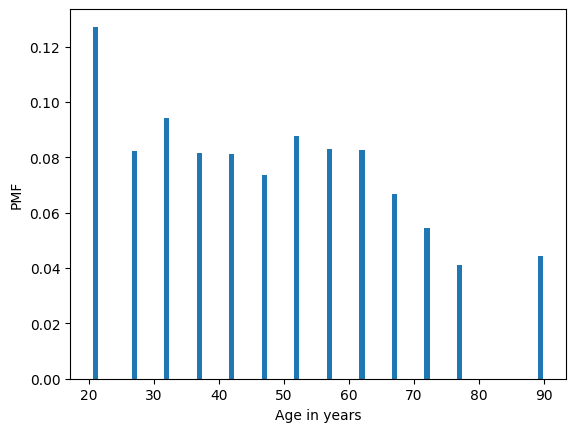

In [24]:
# import brfss datasets as DataFrame
brfss = pd.read_hdf('C:\\Users\\yazan\\Desktop\\Data_Analytics\\7-Exploratory Data Analysis in Python\\datasets\\brfss.hdf5', 'brfss')

# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

1.2 Scatter plot

Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

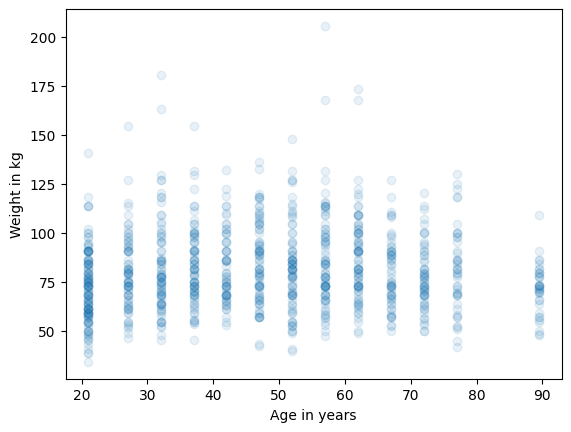

In [25]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

1.3 Jittering

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly.
```python:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
```

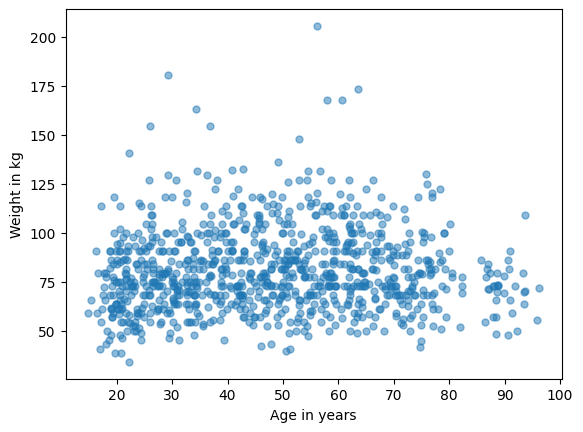

In [26]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

# 2.Visualizing relationships

In the previous section we used scatter plots to visualize relationships between variables, and in the exercises, you explored the relationship between age and weight. In this section, we’ll see other ways to visualize these relationships, including boxplots and violin plots.

2.1 Height and weight

Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

```python:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
```

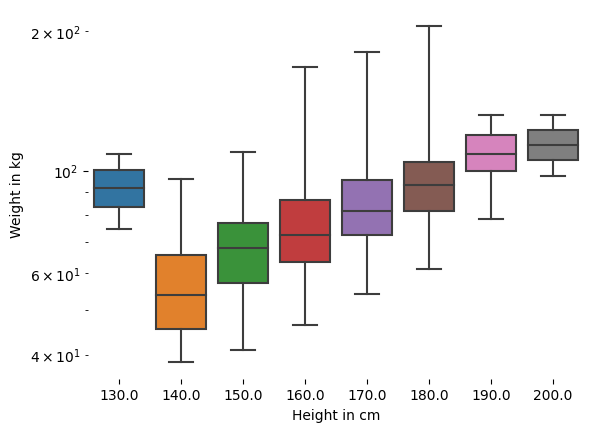

In [28]:
import seaborn as sns

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


2.2 Distribution of income

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.

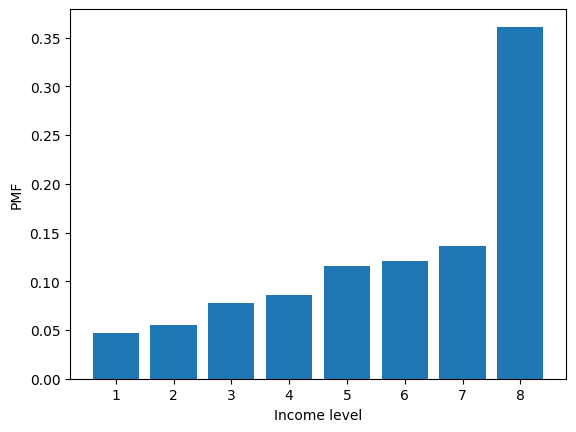

In [29]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()